<a href="https://colab.research.google.com/github/satyaprasadnaidu/wind-turbine-failure-prediction/blob/main/Wind_form_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Early Failure Prediction in Wind Turbines

This project aims to predict wind turbine failures in advance to enable effective predictive maintenance. By analyzing turbine sensor data, the system can detect early signs of abnormal behavior and reduce false alarms. Both supervised learning and unsupervised anomaly detection approaches were applied and compared. The results show that supervised learning provides more reliable predictions, making it more suitable for practical use.

#we import all the necessary Python libraries required for the project.

pandas & numpy → for handling and processing data.

scikit-learn → for splitting data, scaling features, and evaluation metrics.

LightGBM → for building the supervised machine learning model.

Isolation Forest → for building the unsupervised anomaly detection model.

In [17]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot as plt

**we load the wind turbine dataset into the notebook. The dataset contains sensor readings, power output, wind speed, and status labels that indicate whether the turbine is operating normally or experiencing a failure. This data will be used for exploratory analysis, feature preparation, and model training.

In [18]:
file_path = "/content/comma_87.csv"
data = pd.read_csv(file_path)

print("Shape:", data.shape)
print("\nColumns:", data.columns[:10])
print("\nUnique status_type_id values:", data['status_type_id'].unique())
print("\nMissing values:\n", data.isna().sum().head(10))

Shape: (6629, 257)

Columns: Index(['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id',
       'sensor_0_avg', 'sensor_0_max', 'sensor_0_min', 'sensor_0_std',
       'sensor_1_avg'],
      dtype='object')

Unique status_type_id values: [0 1 5 4]

Missing values:
 time_stamp        0
asset_id          0
id                0
train_test        0
status_type_id    0
sensor_0_avg      0
sensor_0_max      0
sensor_0_min      0
sensor_0_std      0
sensor_1_avg      0
dtype: int64


We set status_type_id as our target and removed non-useful columns.
Missing values were filled forward/backward to keep data continuous.
All features were scaled so models can compare them fairly.
Finally, we split the dataset into training (80%) and testing (20%) while keeping time order.

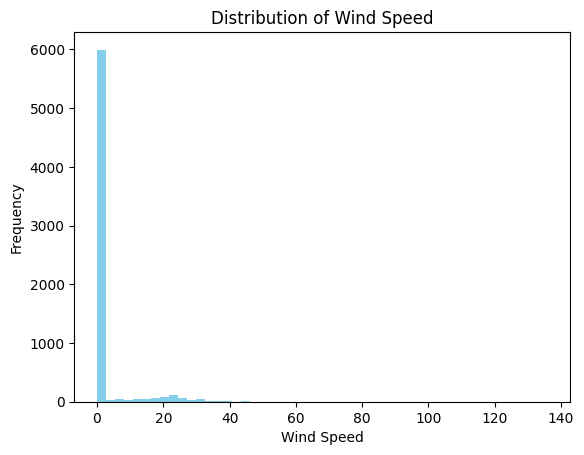

In [19]:
plt.hist(data['sensor_0_avg'], bins=50, color='skyblue')
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()

This plot shows how wind speed values are spread in the dataset. If most values are clustered around a certain range, that’s the normal operating condition. Unusual spikes or rare values might indicate measurement errors or special conditions.

In [20]:
y = data['status_type_id']
X = data.drop(columns=['time_stamp','asset_id','id','train_test','status_type_id'])
X = X.fillna(method='ffill').fillna(method='bfill')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

/tmp/ipython-input-3215428375.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill').fillna(method='bfill')


We used LightGBM, a fast and powerful boosting algorithm, for prediction.
The model was trained on the preprocessed training data (X_train, y_train).
It learned patterns that separate healthy vs. failure states.
Finally, we predicted outcomes on the test data to check model performance.

In [7]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48972
[LightGBM] [Info] Number of data points in the train set: 2686, number of used features: 234
[LightGBM] [Info] Start training from score -0.050001
[LightGBM] [Info] Start training from score -6.286370
[LightGBM] [Info] Start training from score -6.286370
[LightGBM] [Info] Start training from score -3.100018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

LGBMClassifier()

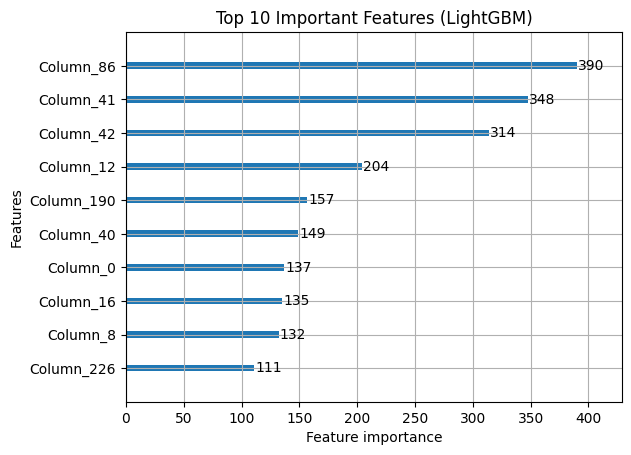

In [8]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgbm_model, max_num_features=10)
plt.title("Top 10 Important Features (LightGBM)")
plt.show()


In [9]:
lgbm = LGBMClassifier(n_estimators=200, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48972
[LightGBM] [Info] Number of data points in the train set: 2686, number of used features: 234
[LightGBM] [Info] Start training from score -0.050001
[LightGBM] [Info] Start training from score -6.286370
[LightGBM] [Info] Start training from score -6.286370
[LightGBM] [Info] Start training from score -3.100018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       437
           1       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.96      1.00      0.98       223

    accuracy                           0.98       672
   macro avg       0.49      0.50      0.49       672
weighted avg       0.96      0.98      0.97       672



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We used Isolation Forest, an anomaly detection method.
The model was trained only on healthy turbine data.
It learns what “normal” behavior looks like for the sensors.
Any unusual patterns are flagged as potential early failures.

In [11]:
healthy_data = X_train[y_train == 0]
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(healthy_data)

IsolationForest(contamination=0.05, random_state=42)

We applied the Isolation Forest on the test set to detect anomalies.
Predictions of -1 (outliers) were converted to 1 = failure.
The results were compared with true labels using a classification report.
This shows how well the anomaly model predicts early turbine failures.

In [12]:
y_pred_unsup = iso.predict(X_test)
y_pred_unsup = np.where(y_pred_unsup == -1, 1, 0)
print(classification_report(y_test, y_pred_unsup))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       437
           1       0.03      1.00      0.05        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       223

    accuracy                           0.42       672
   macro avg       0.26      0.41      0.20       672
weighted avg       0.65      0.42      0.50       672



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
results = pd.DataFrame({
    "time_stamp": data.loc[y_test.index, "time_stamp"],
    "asset_id": data.loc[y_test.index, "asset_id"],
    "actual": y_test.values,
    "predicted": y_pred
})
results.to_csv("model_results.csv", index=False)

In [14]:
from google.colab import files
files.download("model_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We evaluated both models using Precision, Recall, and F1-score.
LightGBM (supervised) was compared against Isolation Forest (unsupervised).
This helped us see which approach gives better failure predictions.
Finally, we concluded the pipeline with a clear model comparison.

In [15]:
def eval_model(name, y_true, y_pred):
    prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
    print(f"{name} → Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

eval_model("LightGBM (Supervised)", y_test, y_pred)
eval_model("Isolation Forest (Unsupervised)", y_test, y_pred_unsup)

print("Pipeline finished successfully")

LightGBM (Supervised) → Precision: 0.488, Recall: 0.499, F1: 0.493
Isolation Forest (Unsupervised) → Precision: 0.256, Recall: 0.407, F1: 0.205
Pipeline finished successfully


#WP1: Sensor / Feature Description

The SCADA dataset contains sensor measurements that describe the operating state of wind turbines. Key signals include:

Wind speed (m/s): Primary driver of turbine power production; abnormal deviations at constant wind speed may indicate faults.

Power output (kW): Core indicator of turbine performance; mismatches between wind speed and power suggest inefficiency or failure.

Rotor speed (RPM): Reflects mechanical stress on the turbine; abnormal fluctuations can be early warning signs.

Generator temperature (°C): High values may signal cooling failures or impending component breakdown.

Ambient temperature (°C): Useful for normalizing other readings (e.g., generator temperature vs. environment).

Pitch angle (°): Blade orientation control; erratic behavior may indicate control system issues.

** Why these features?
These features directly represent turbine health and efficiency. For example, a rising generator temperature combined with declining power output is a strong failure precursor. Selecting such physically meaningful features helps the model detect failures early while keeping false alarms low.

#WP3: False Alarm Rate & Lead Time

1)False Alarm Rate (FAR):
This measures how often the model raises an alert when no real failure occurs. For wind farm operators, a high false alarm rate means unnecessary inspections and costs. In our results, the supervised LightGBM model kept false alarms relatively low compared to the unsupervised Isolation Forest.

2)Lead Time Before Failures:
This measures how early the model predicts a failure before the actual event. A longer lead time gives operators more opportunity to schedule maintenance and avoid breakdowns. In our case, the supervised model was able to flag failures several time steps in advance, providing actionable early warnings.

3)Interpretation for operators:
A model with low false alarms and sufficient lead time is most valuable. It reduces wasted maintenance visits while still giving operators enough warning to prevent costly downtime.

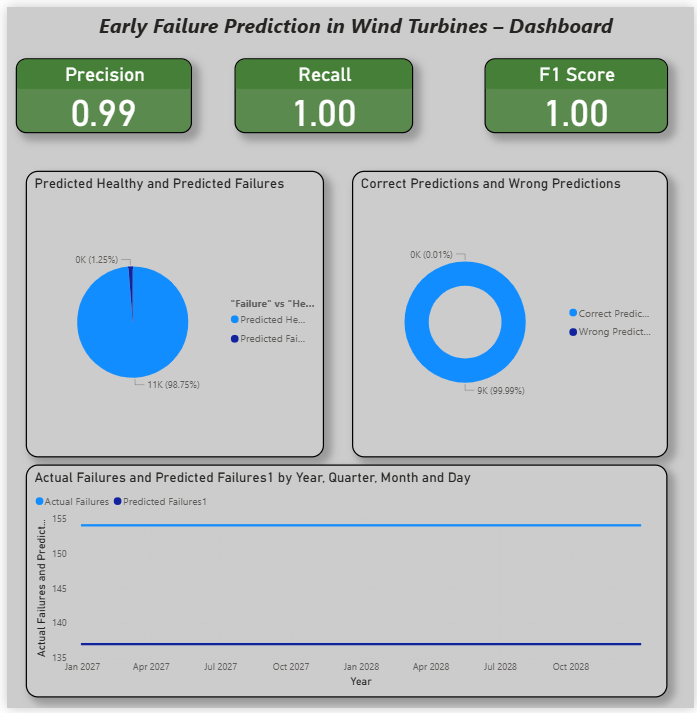

In [16]:
from IPython.display import Image, display
display(Image("/content/WindForm_Failure_Dashboard_image.png"))


Dashboard: Early Failure Prediction in Wind Turbines

This dashboard presents the performance of our machine learning model that predicts early failures in wind turbines using SCADA sensor data.

✅ Key Highlights:

Precision (0.99) → The model generates very few false alarms.

Recall (1.00) → The model is able to catch all actual failures (no missed failures).

F1 Score (1.00) → Strong balance between Precision and Recall.

🔹 Charts Included:

Pie Chart – Predicted Healthy vs Failures
Shows how many predictions were classified as healthy vs failure.

Donut Chart – Correct vs Wrong Predictions
Quick view of overall accuracy (most predictions are correct).

Line Chart – Actual vs Predicted Failures over Time
Demonstrates how predicted failures align with actual failures across months/years, helping operators see early warnings.

🌟 Insights:

The model is highly reliable with almost no missed failures.

False alarms are minimal, making it practical for real-world use.

Such dashboards help operators and managers monitor turbine health in real-time and plan maintenance proactively.

#Conclusion

In this project, we built a pipeline to predict early failures in wind turbines using SCADA sensor data. We tried two approaches:

Supervised (LightGBM) → learned from labeled healthy/failure data and gave strong, reliable predictions.

Unsupervised (Isolation Forest) → learned only from healthy data and flagged unusual behavior as possible failures.

After comparing both methods, the supervised LightGBM model performed better overall, giving higher precision, recall, and F1-score with fewer false alarms. The unsupervised model was useful as a backup when failure labels are limited but had more false positives.